In [5]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
from subprocess import check_output

In [2]:
auto_data = pd.read_csv("Automobiledata_cleaned.csv")

In [3]:
auto_data = pd.DataFrame(auto_data)

In [4]:
auto_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'num_cylinders', 'num_doors', 'Area',
       'engine_size_cc', 'hp2cw_ratio', 'risk_analysis', 'risky'],
      dtype='object')

##  Car sales effecting features

### Problem - 1: What are the highest selling cars based on brand, body-style, drive-wheels?
Rear wheel drive and front wheel drive with four doors are sold as per Phase-2 analysis

grouping by drive-wheels and body-style, and aggregating price
drive-wheels       body-style 
Four Wheel Drive   hatchback       25462.166667
                   sedan           37942.000000
                   wagon           36383.000000
Front Wheel Drive  convertible     11595.000000
                   hardtop          8249.000000
                   hatchback      401528.000000
                   sedan          520296.000000
                   wagon          110673.000000
Rear Wheel Drive   convertible     52725.000000
                   hardtop        102863.000000
                   hatchback      161949.000000
                   sedan          703291.000000
                   wagon          152948.000000
Name: price, dtype: float64


Text(0, 0.5, 'price')

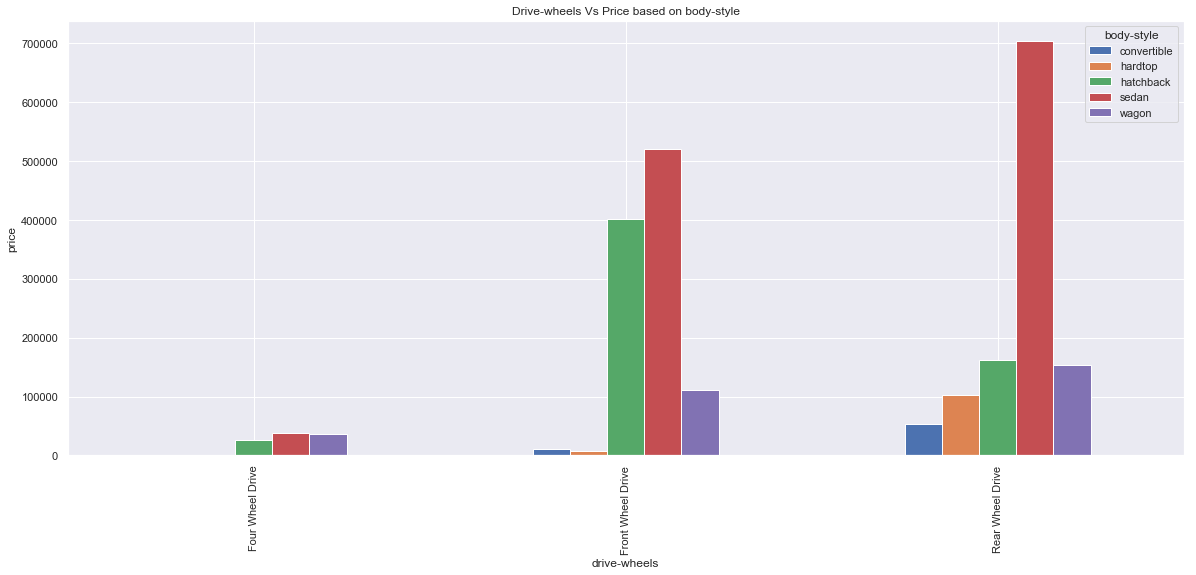

In [22]:
groupbywheelsdoors = auto_data.groupby(['drive-wheels', 'body-style'])
print("grouping by drive-wheels and body-style, and aggregating price")
print(groupbywheelsdoors['price'].aggregate(np.sum))
#Without the hierarchical indexing
wheelsdoorspricesum = groupbywheelsdoors['price'].aggregate(np.sum).unstack()

wheelsdoorspricesum.plot(kind = 'bar', title = 'Drive-wheels Vs Price based on body-style', figsize=(20,8))
plt.ylabel('price')

#### car sales by drive-wheels

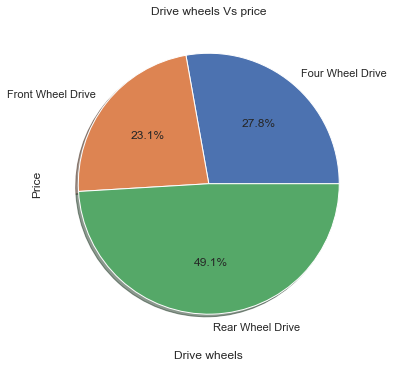

In [7]:
auto_data.groupby('drive-wheels')['price'].mean().plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(6,6));
plt.title("Drive wheels Vs price")
plt.ylabel('Price')
plt.xlabel('Drive wheels');

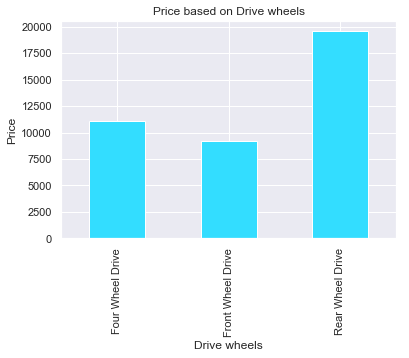

In [8]:
auto_data.groupby('drive-wheels')['price'].mean().plot(kind='bar', color = '#33ddff');
plt.title("Price based on Drive wheels")
plt.ylabel('Price')
plt.xlabel('Drive wheels');

#### Car sales by body-style

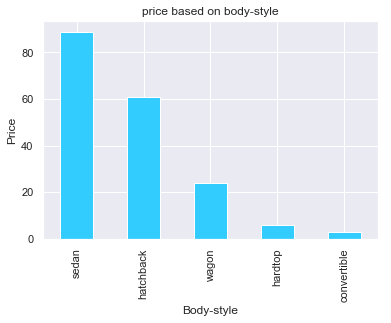

In [21]:
auto_data["body-style"].value_counts()[:20].plot(kind='bar',color = '#33ccff')
plt.title("price based on body-style")
plt.ylabel('Price')
plt.xlabel('Body-style');

#### groupby drive-wheels and body-style with engine_size

grouping by drive-wheels and number of doors, and aggregating symboling
drive-wheels       body-style 
Four Wheel Drive   hatchback       3915
                   sedan           5766
                   wagon           6552
Front Wheel Drive  convertible     1786
                   hardtop         1589
                   hatchback      82776
                   sedan          96114
                   wagon          20708
Rear Wheel Drive   convertible     6226
                   hardtop        15155
                   hatchback      27526
                   sedan          85929
                   wagon          21298
Name: engine_size_cc, dtype: int64


Text(0, 0.5, 'Engine_size')

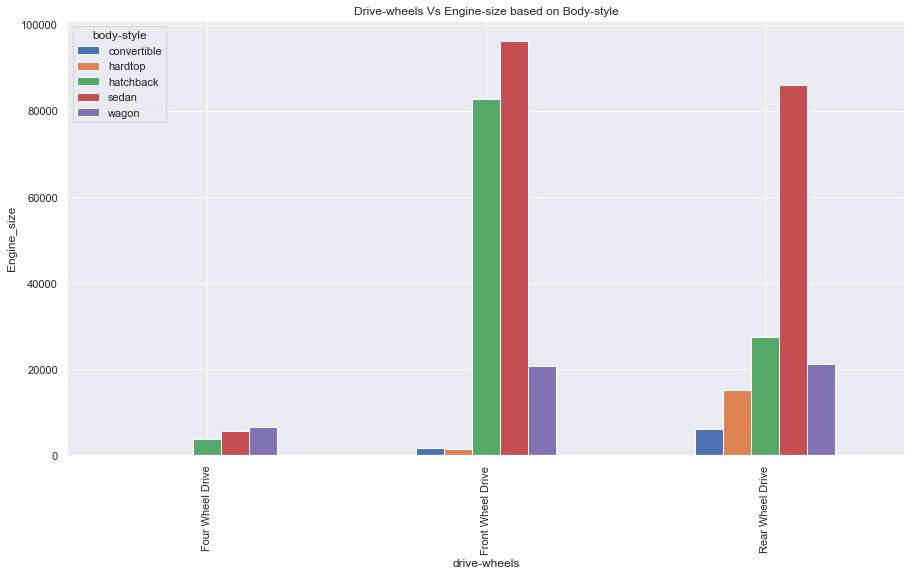

In [20]:
groupbywheelsdoors = auto_data.groupby(['drive-wheels', 'body-style'])
print("grouping by drive-wheels and number of doors, and aggregating symboling")
print(groupbywheelsdoors['engine_size_cc'].aggregate(np.sum))
#Without the hierarchical indexing
wheelsdoorspricesum = groupbywheelsdoors['engine_size_cc'].aggregate(np.sum).unstack()
wheelsdoorspricesum.plot(kind = 'bar', title = 'Drive-wheels Vs Engine-size based on Body-style', figsize=(15,8))
plt.ylabel('Engine_size')

#### Checking for the car make for maximum sales

grouping by drive-wheels and number of doors, and aggregating symboling
body-style   make         
convertible  mercedes-benz     35056.000000
             toyota            17669.000000
             volkswagen        11595.000000
hardtop      mercedes-benz     73576.000000
             nissan             8249.000000
             toyota            29287.000000
hatchback    audi              17859.166667
             chevrolet         11446.000000
             dodge             39099.000000
             honda             49381.000000
             mazda             48770.000000
             mitsubishi        86381.000000
             nissan            72045.000000
             plymouth          32522.000000
             porsche           22018.000000
             saab              45040.000000
             subaru            19774.000000
             toyota           134624.000000
             volkswagen         9980.000000
sedan        audi              88235.000000
             bmw     

Text(0, 0.5, 'price')

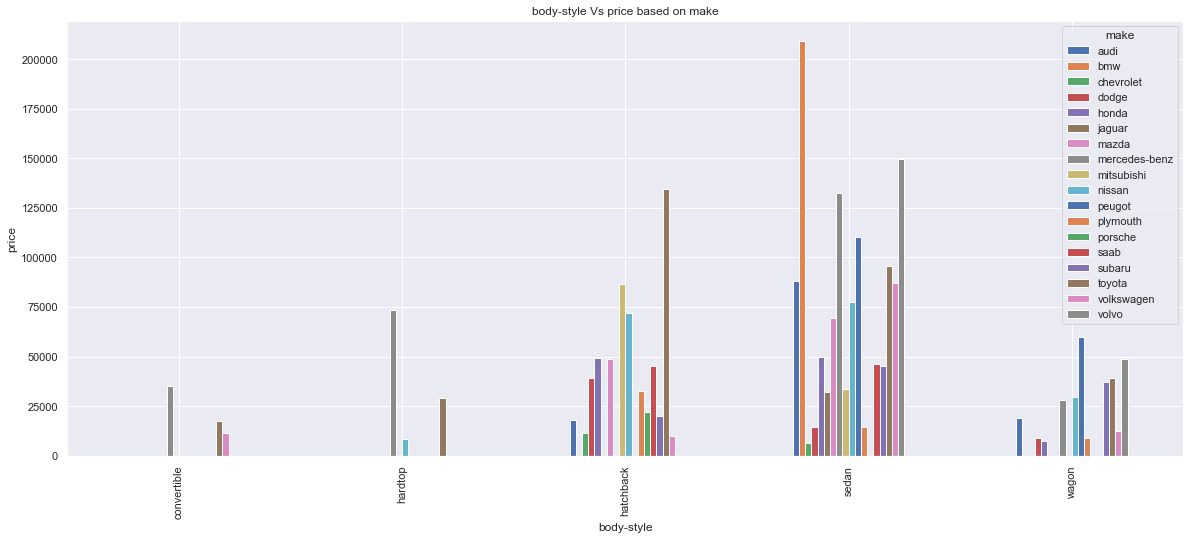

In [19]:
groupbywheelsdoors = auto_data.groupby(['body-style', 'make'])
print("grouping by drive-wheels and number of doors, and aggregating symboling")
print(groupbywheelsdoors['price'].aggregate(np.sum))
#Without the hierarchical indexing
wheelsdoorspricesum = groupbywheelsdoors['price'].aggregate(np.sum).unstack()
wheelsdoorspricesum.plot(kind = 'bar', title = 'body-style Vs price based on make', figsize=(20,8))
plt.ylabel('price')

#### Checking for Car sales by grouping make and drive-wheels

grouping by drive-wheels and number of doors, and aggregating symboling
make           drive-wheels     
audi           Four Wheel Drive      35309.166667
               Front Wheel Drive     89705.000000
bmw            Rear Wheel Drive     208950.000000
chevrolet      Front Wheel Drive     18021.000000
dodge          Front Wheel Drive     62321.000000
honda          Front Wheel Drive    106401.000000
jaguar         Rear Wheel Drive      32250.000000
mazda          Front Wheel Drive     81600.000000
               Rear Wheel Drive      36624.000000
mercedes-benz  Rear Wheel Drive     269176.000000
mitsubishi     Front Wheel Drive    120117.000000
nissan         Front Wheel Drive    132185.000000
               Rear Wheel Drive      55297.000000
peugot         Rear Wheel Drive     170380.000000
plymouth       Front Wheel Drive     42980.000000
               Rear Wheel Drive      12764.000000
porsche        Rear Wheel Drive      22018.000000
saab           Front Wheel Drive     91340.00

Text(0, 0.5, 'price')

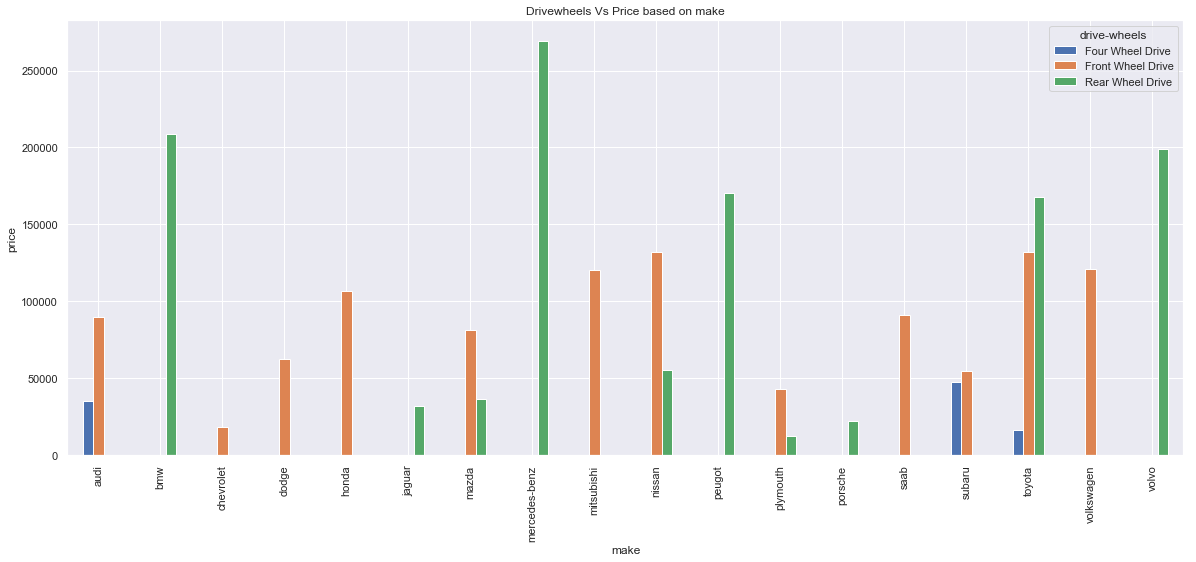

In [18]:
groupbywheelsdoors = auto_data.groupby(['make', 'drive-wheels'])
print("grouping by drive-wheels and number of doors, and aggregating symboling")
print(groupbywheelsdoors['price'].aggregate(np.sum))
#Without the hierarchical indexing
wheelsdoorspricesum = groupbywheelsdoors['price'].aggregate(np.sum).unstack()
wheelsdoorspricesum.plot(kind = 'bar', title = 'Drivewheels Vs Price based on make', figsize=(20,8))
plt.ylabel('price')

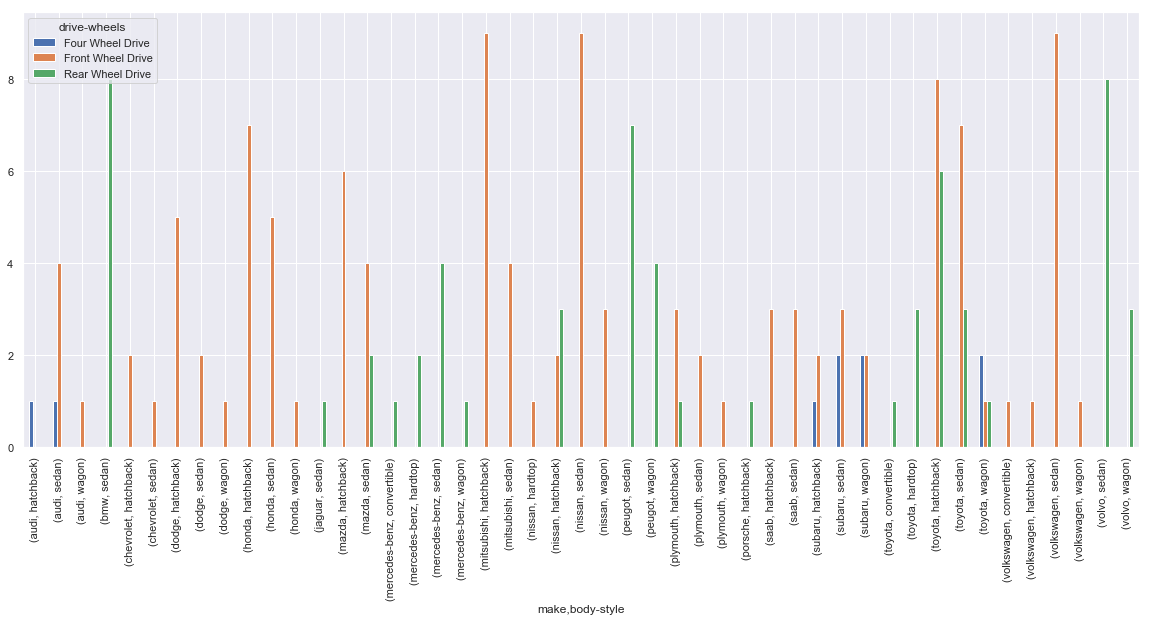

In [24]:
auto_data.groupby(['make', 'body-style', 'drive-wheels']).make.count().unstack().plot.bar(legend=True, figsize=(20,8))

### Conclusion:

1. Initial analysis based on drive-wheels and body-style the sales of Rear-wheel drive in sedan models is good and highest.
2. Rear wheel drive sales are more compared to front wheel drive and Four wheel drive. The Rear wheel drive cars are 49.1% of total sales across all brands or make.
3. Car sales by body-style are more in sedan segment followed by hatchback.
4. Car sales based on drive-wheels when considered engine-size, the sales are more for Front wheel drive followed by rear wheel drive in sedan models
5. Car sales based on body-style w.r.to make is strengthening the above statements. Sales of car brand/make is more in bmw, Mercedes-Benz, volvo, peugot and toyota.

### Problem - 2: Does engine parameters determine the car price?

In [30]:
# pre configuring the charts details
title_color = "navy"
plot_color = "#33ccff"
plot_alt_color = "#33AAff"
plot_color_secondary = "deepskyblue"
y_title_margin = 1.0

def DrawPairPlot(dframe, kind, diag_kind, filename):
    '''
    Draw the pair plot based on the given parameters..
    '''
    sns.pairplot(dframe, kind = kind, diag_kind = diag_kind, diag_kws=dict(color=plot_color, linewidth=1), plot_kws=dict(color=plot_color))
    plt.savefig(filename, bbox_inches='tight')

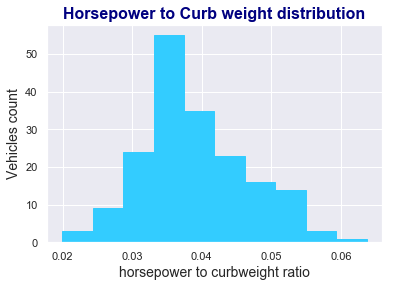

In [28]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.1)

price_dist = auto_data[['hp2cw_ratio']].hist(color=plot_color, ax=ax, edgecolor=plot_color, linewidth=1)

ax.set_title(label="Horsepower to Curb weight distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.set_ylabel('Vehicles count',fontsize=14 )
ax.set_xlabel('horsepower to curbweight ratio',fontsize=14)

plt.show()

Text(0.5, 0, 'horsepower to curb-weight')

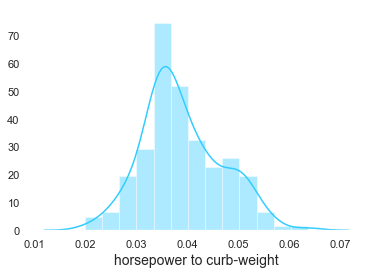

In [29]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

price_dist = sns.distplot(auto_data["hp2cw_ratio"], hist=True, color=plot_color, ax=ax);
ax.set_xlabel('horsepower to curb-weight',fontsize=14)

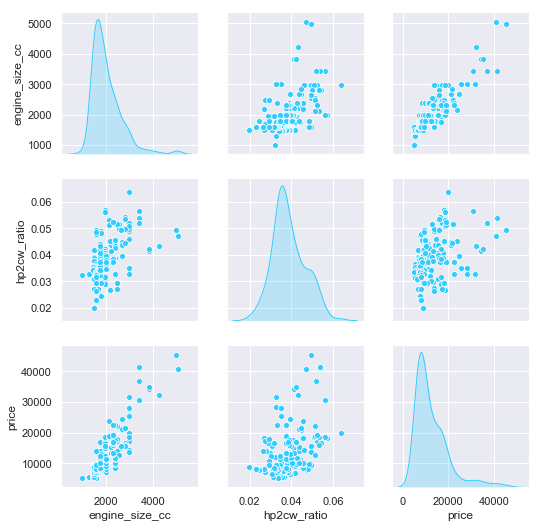

In [31]:
autoData_Columns = ['engine_size_cc','hp2cw_ratio','price']
filename = "automobile_enginesize_pairplot.png"
DrawPairPlot(auto_data[autoData_Columns], "scatter", "kde", filename)

In [32]:
auto_engine_size = auto_data
auto_engine_size["engine_size"] = np.where(auto_engine_size["engine_size_cc"] <= 1000, "0-1000", np.NAN)
auto_engine_size["engine_size"] = np.where((auto_engine_size["engine_size_cc"] > 1000) & (auto_engine_size["engine_size_cc"] <= 2000), "1000-2000", auto_engine_size["engine_size"])
auto_engine_size["engine_size"] = np.where((auto_engine_size["engine_size_cc"] > 2000) & (auto_engine_size["engine_size_cc"] <= 3000), "2000-3000", auto_engine_size["engine_size"])
auto_engine_size["engine_size"] = np.where((auto_engine_size["engine_size_cc"] > 3000) & (auto_engine_size["engine_size_cc"] <= 6000), "3000-6000", auto_engine_size["engine_size"])

In [33]:
autoDatabyPrice = auto_engine_size.pivot_table(index='engine_size', values='price', aggfunc='count').fillna(0)
autoDatabyPrice.reset_index(inplace=True)
autoDatabyPrice["Auto-cars-count"] = autoDatabyPrice["price"]
autoDatabyPrice.drop("price", axis=1, inplace=True)
autoDatabyPrice

,engine_size,Auto-cars-count
0,0-1000,1
1,1000-2000,119
2,2000-3000,55
3,3000-6000,8


Text(0.5, 0, 'engine_size in CC')

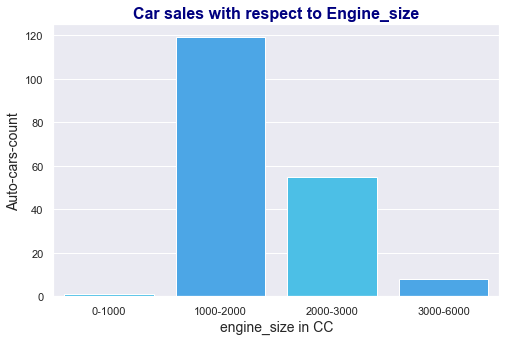

In [34]:
fig, ax = plt.subplots(figsize=(8,5), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Car sales with respect to Engine_size", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
col_dist = sns.barplot(data=autoDatabyPrice, x="engine_size", y="Auto-cars-count", ax=ax, palette=[plot_color, plot_alt_color])

col_dist.set_ylabel('Auto-cars-count', fontsize=14 )
col_dist.set_xlabel('engine_size in CC', fontsize=14)

#fig.savefig('car_sales_by_price_slab.png',dpi=fig.dpi,bbox_inches='tight')

Text(0.5, 1.0, 'Car sales by engine_size in CC')

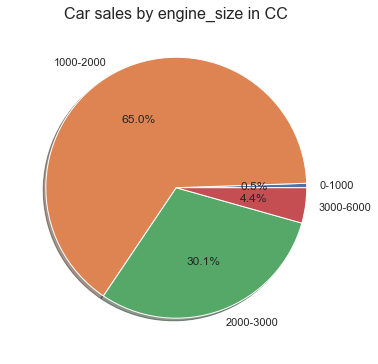

In [36]:
fig, ax = plt.subplots(figsize=(6,6), ncols=1, nrows=1)
plt.pie(autoDatabyPrice['Auto-cars-count'],
        labels=autoDatabyPrice['engine_size'],
        shadow= True,
        autopct='%1.1f%%')

plt.title('Car sales by engine_size in CC', fontsize=16)

#plt.savefig('cars_sales_by_price_range_pie.png', bbox_inches='tight')

#### Engine-size Vs Car body-style with respect to make

grouping by drive-wheels and number of doors, and aggregating symboling
body-style   make         
convertible  mercedes-benz     3834
             toyota            2392
             volkswagen        1786
hardtop      mercedes-benz     7979
             nissan            1589
             toyota            7176
hatchback    audi              2146
             chevrolet         2473
             dodge             8583
             honda            10926
             mazda            10470
             mitsubishi       17595
             nissan           12453
             plymouth          7109
             porsche           2474
             saab              5946
             subaru            5127
             toyota           27129
             volkswagen        1786
sedan        audi             10616
             bmw              21871
             chevrolet         1474
             dodge             2948
             honda             8715
             jaguar            4227
 

Text(0, 0.5, 'Engine_size in CC')

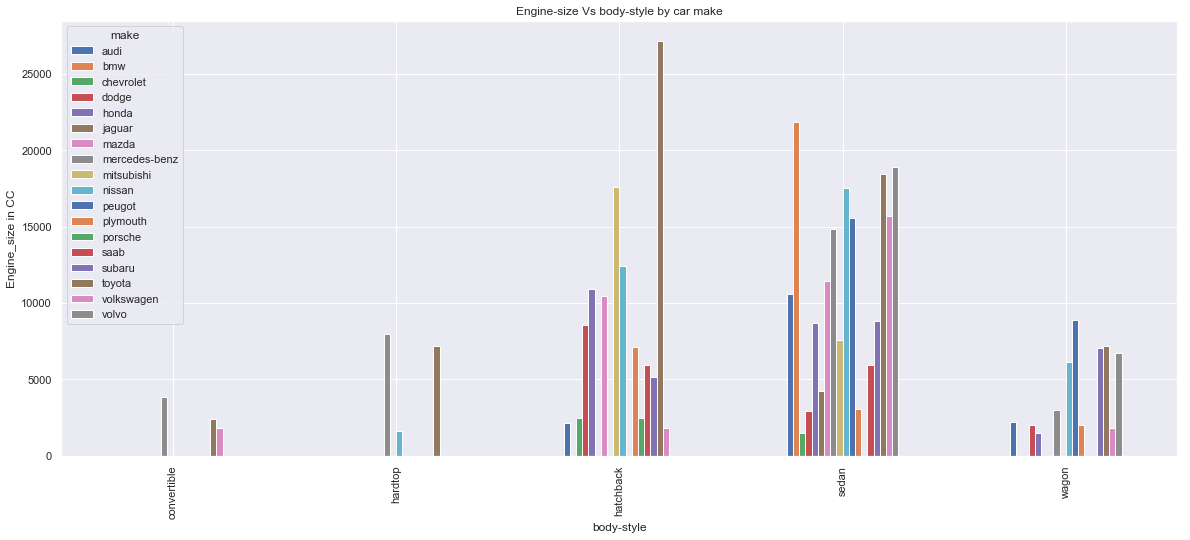

In [38]:
groupbywheelsdoors = auto_data.groupby(['body-style', 'make'])
print("grouping by drive-wheels and number of doors, and aggregating symboling")
print(groupbywheelsdoors['engine_size_cc'].aggregate(np.sum))
#Without the hierarchical indexing
wheelsdoorspricesum = groupbywheelsdoors['engine_size_cc'].aggregate(np.sum).unstack()
wheelsdoorspricesum.plot(kind = 'bar', title = 'Engine-size Vs body-style by car make', figsize=(20,8))
plt.ylabel('Engine_size in CC')

In [39]:
auto_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'num_cylinders', 'num_doors', 'Area',
       'engine_size_cc', 'hp2cw_ratio', 'risk_analysis', 'risky',
       'engine_size'],
      dtype='object')

In [40]:
autoCurbweight = auto_data
autoCurbweight["curb_weight"] = np.where(autoCurbweight["curb-weight"] <= 1000, "0-1000", np.NAN)
autoCurbweight["curb_weight"] = np.where((autoCurbweight["curb-weight"] > 1000) & (autoCurbweight["curb-weight"] <= 2000), "1000-2000", autoCurbweight["curb_weight"])
autoCurbweight["curb_weight"] = np.where((autoCurbweight["curb-weight"] > 2000) & (autoCurbweight["curb-weight"] <= 3000), "2000-3000", autoCurbweight["curb_weight"])
autoCurbweight["curb_weight"] = np.where((autoCurbweight["curb-weight"] > 3000) & (autoCurbweight["curb-weight"] <= 6000), "3000-6000", autoCurbweight["curb_weight"])

In [41]:
cars_by_price_slab = autoCurbweight.pivot_table(index='curb_weight', values='price', aggfunc='count').fillna(0)
cars_by_price_slab.reset_index(inplace=True)
cars_by_price_slab["Auto-cars-count"] = cars_by_price_slab["price"]
cars_by_price_slab.drop("price", axis=1, inplace=True)
cars_by_price_slab

,curb_weight,Auto-cars-count
0,1000-2000,29
1,2000-3000,110
2,3000-6000,44


grouping by Engine_size and curb-weight, and aggregating price
engine_size  curb_weight
0-1000       1000-2000        5151.000000
1000-2000    1000-2000      179129.000000
             2000-3000      806850.000000
             3000-6000       82023.000000
2000-3000    2000-3000      381879.000000
             3000-6000      574067.166667
3000-6000    3000-6000      296805.000000
Name: price, dtype: float64


Text(0, 0.5, 'price')

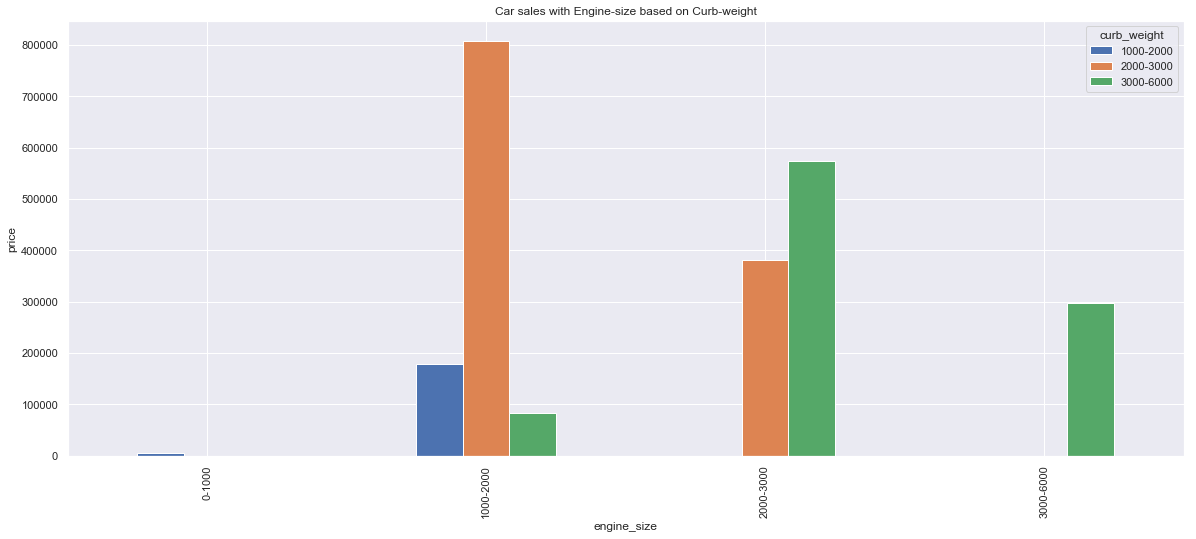

In [43]:
groupbywheelsdoors = auto_data.groupby(['engine_size', 'curb_weight'])
print("grouping by Engine_size and curb-weight, and aggregating price")
print(groupbywheelsdoors['price'].aggregate(np.sum))
#Without the hierarchical indexing
wheelsdoorspricesum = groupbywheelsdoors['price'].aggregate(np.sum).unstack()
wheelsdoorspricesum.plot(kind = 'bar', title = 'Car sales with Engine-size based on Curb-weight', figsize=(20,8))
plt.ylabel('price')

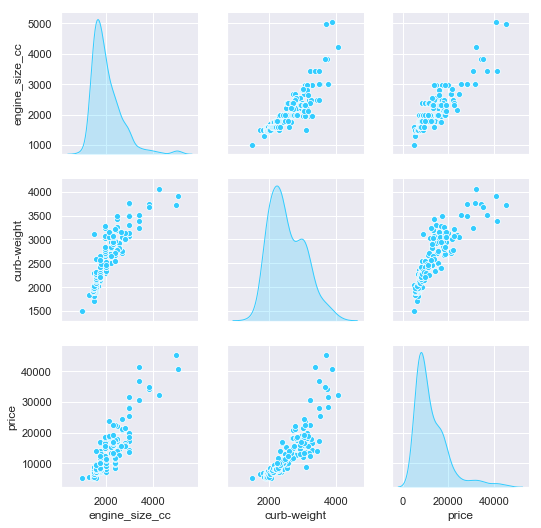

In [44]:
autoDataColumns = ['engine_size_cc','curb-weight','price']
filename = "automobile_enginesize_curbweight.png"
DrawPairPlot(auto_data[autoDataColumns], "scatter", "kde", filename)

Text(0.5, 1.0, 'Car sales based on body style')

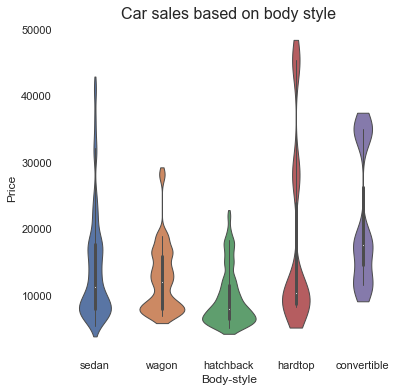

In [45]:
fig, ax = plt.subplots(figsize=(6,6), ncols=1, nrows=1)
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

sns.violinplot(data=auto_data, x="body-style", y="price", bw=.2, cut=1, linewidth=1, ax=ax)
ax.set_xlabel('Body-style',fontsize=12)
ax.set_ylabel('Price', fontsize=12)

ax.set_title("Car sales based on body style", y = y_title_margin, fontsize=16)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


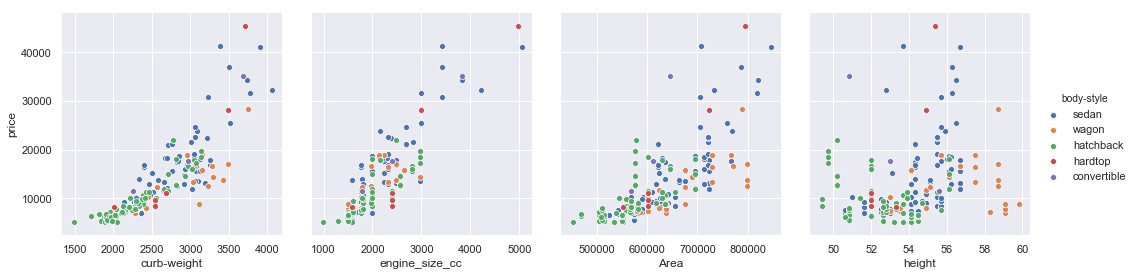

In [46]:
body_price_plot =  sns.pairplot(auto_data, 
             size=4, aspect=0.9, 
             x_vars=['curb-weight', 'engine_size_cc', 'Area', 'height'],
             y_vars=["price"], 
             kind='scatter',
             hue="body-style")

### Which of the cars have the highest normalized-losses per year based on the car body type and style?

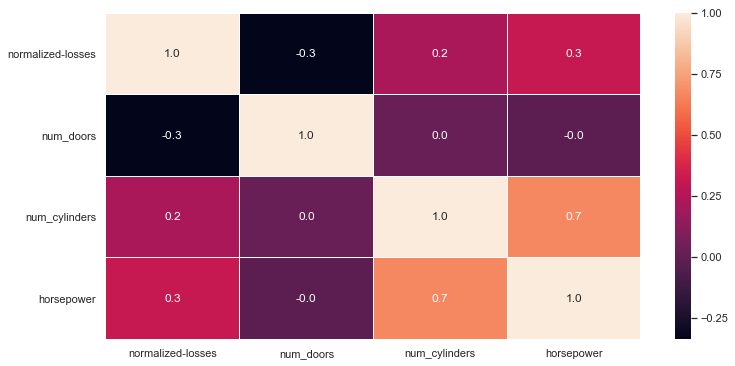

In [48]:
#Correlation map for normalized-losses w.r.to doors, horsepower & cylinders
plt.figure(figsize=(12,6))
autoDataColumns = ['normalized-losses','num_doors', 'num_cylinders', 'horsepower']
sns.heatmap(auto_data[autoDataColumns].corr(), annot=True, fmt='.1f', linewidths=.3)

Car doors are negatively correlated to normalized losses.
At the same time horsepower is possitively correlated to normalized losses.

grouping by body-stylenum_doors, and aggregating normalizedlosses
body-style   num_doors
convertible  2             397.250000
hardtop      2             765.800000
hatchback    2            7053.600000
             4            1000.000000
sedan        2            1930.000000
             4            9071.033333
wagon        4            2524.540323
Name: normalized-losses, dtype: float64


Text(0, 0.5, 'normalized-losses')

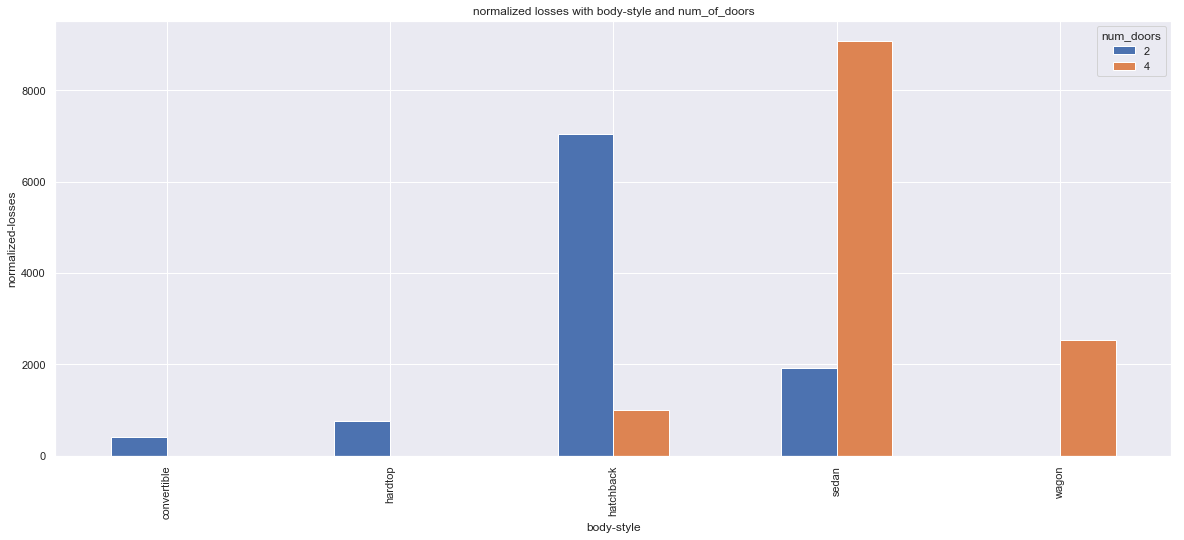

In [58]:
#Groupby Car doors and body style with normalized-losses
groupbywheelsdoors = auto_data.groupby(['body-style', 'num_doors'])
print("grouping by body-stylenum_doors, and aggregating normalizedlosses")
print(groupbywheelsdoors['normalized-losses'].aggregate(np.sum))
#Without the hierarchical indexing
wheelsdoorspricesum = groupbywheelsdoors['normalized-losses'].aggregate(np.sum).unstack()
wheelsdoorspricesum.plot(kind = 'bar', title = 'normalized losses with body-style and num_of_doors', figsize=(20,8))
plt.ylabel('normalized-losses')

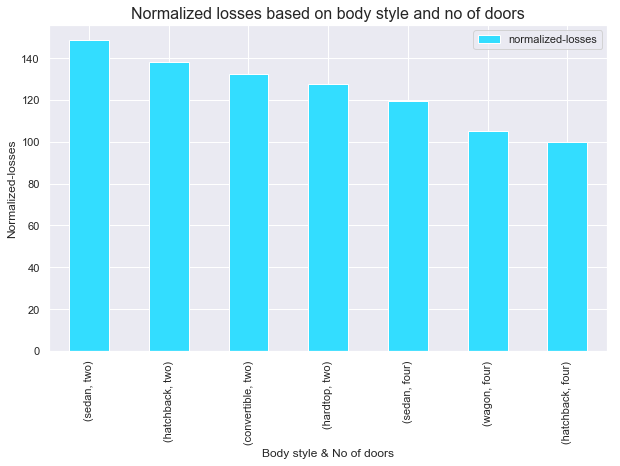

In [50]:
#Normalized-losses based on body-style and doors
autoDataCars = pd.pivot_table(auto_data,index=['body-style','num-of-doors'], values='normalized-losses').sort_values(by=['normalized-losses'], ascending=False)
autoDataCars.plot.bar(color="#33ddff", figsize=(10,6))
plt.title("Normalized losses based on body style and no of doors", fontsize=16)
plt.ylabel('Normalized-losses', fontsize=12)
plt.xlabel('Body style & No of doors', fontsize=12);

grouping by Engine_size and curb-weight, and aggregating price
make           body-style 
audi           hatchback       161.000000
               sedan           805.000000
               wagon           161.000000
bmw            sedan          1520.000000
chevrolet      hatchback       219.000000
               sedan            81.000000
dodge          hatchback       647.000000
               sedan           296.000000
               wagon           110.000000
honda          hatchback       789.000000
               sedan           472.000000
               wagon            78.000000
jaguar         sedan           145.000000
mazda          hatchback       685.000000
               sedan           697.933333
mercedes-benz  convertible     142.000000
               hardtop         195.800000
               sedan           391.600000
               wagon            93.000000
mitsubishi     hatchback      1388.600000
               sedan           512.000000
nissan         hardtop      

Text(0, 0.5, 'normalized-losses')

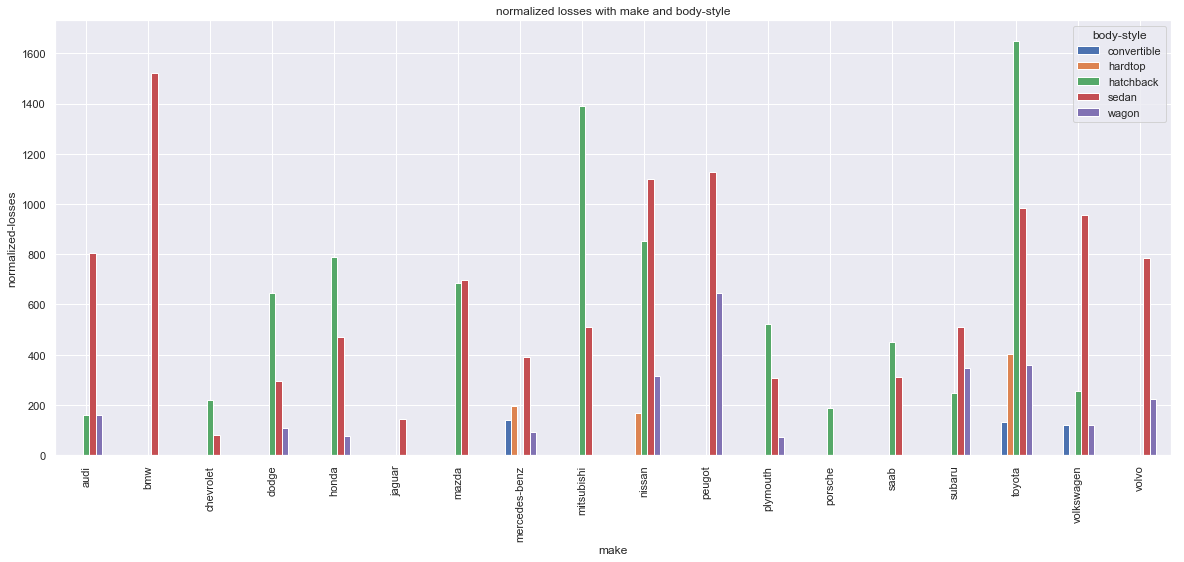

In [59]:
#Grouping car make and body-style by aggregating normalized-losses
groupbywheelsdoors = auto_data.groupby(['make', 'body-style'])
print("grouping by Engine_size and curb-weight, and aggregating price")
print(groupbywheelsdoors['normalized-losses'].aggregate(np.sum))
#Without the hierarchical indexing
wheelsdoorspricesum = groupbywheelsdoors['normalized-losses'].aggregate(np.sum).unstack()
wheelsdoorspricesum.plot(kind = 'bar', title = 'normalized losses with make and body-style', figsize=(20,8))
plt.ylabel('normalized-losses')

Text(0.5, 0, 'Car Brand')

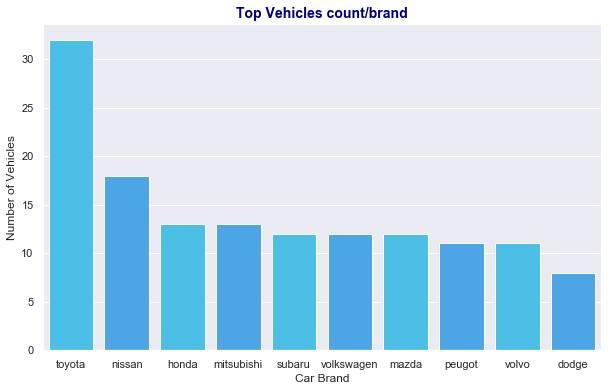

In [52]:
#Top vehicle sales
autoTopVehicles = auto_data["make"].value_counts()[:10].to_frame().reset_index()
autoMakeColumns = autoTopVehicles["index"].tolist()

fig, ax = plt.subplots(figsize=(10,6), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Top Vehicles count/brand", y = y_title_margin, color=title_color, fontsize=14, fontweight="bold")
col_dist = sns.countplot(data=auto_data[auto_data.make.isin(autoMakeColumns)], order=autoMakeColumns, x="make", ax=ax, palette=[plot_color, plot_alt_color])

col_dist.set_ylabel('Number of Vehicles', fontsize=12 )
col_dist.set_xlabel('Car Brand', fontsize=12)

grouping by car brand and num of doors, and aggregating with normalized-losses
make           num_doors
audi           2             322.000000
               4             805.000000
bmw            2             570.000000
               4             950.000000
chevrolet      2             219.000000
               4              81.000000
dodge          2             499.000000
               4             554.000000
honda          2             896.000000
               4             443.000000
jaguar         4             145.000000
mazda          2             570.000000
               4             812.933333
mercedes-benz  2             337.800000
               4             484.600000
mitsubishi     2            1388.600000
               4             512.000000
nissan         2            1427.000000
               4            1006.000000
peugot         4            1771.000000
plymouth       2             367.000000
               4             536.000000
porsche        2

Text(0, 0.5, 'normalized-losses')

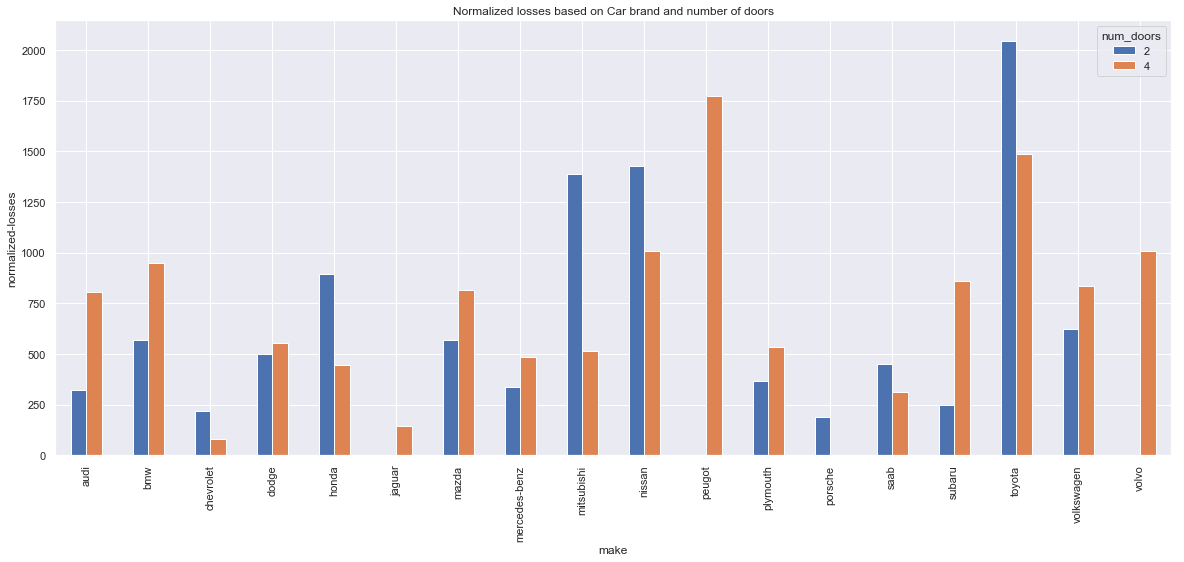

In [55]:
#Grouping car make and number of doors by aggregating normalized-losses
groupbywheelsdoors = auto_data.groupby(['make', 'num_doors'])
print("grouping by car brand and num of doors, and aggregating with normalized-losses")
print(groupbywheelsdoors['normalized-losses'].aggregate(np.sum))
#Without the hierarchical indexing
wheelsdoorspricesum = groupbywheelsdoors['normalized-losses'].aggregate(np.sum).unstack()
wheelsdoorspricesum.plot(kind = 'bar', title = 'Normalized losses based on Car brand and number of doors', figsize=(20,8))
plt.ylabel('normalized-losses')

#### Conclusion:

a. Toyota are the largest car sellers and the two door cars of Toyota has reported highest normalised losses.

b. On an average the Sedan cars with two doors are reported with highest normalized losses. Two door hatchback & convertible body-style cars report next highest.